In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('train.csv')

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Handle missing values
# Age: Fill missing values with median age grouped by Pclass and Sex
# Fixed version - use transform instead of apply to maintain original index
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# Cabin: Too many missing values (687/891), will drop this column
df.drop('Cabin', axis=1, inplace=True)

# Embarked: Only 2 missing values, fill with most common port
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Fare: One missing value, fill with median fare for that Pclass
df['Fare'] = df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

# Create new features that might be useful
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


C:\Users\purab\AppData\Local\Temp\ipykernel_1948\3087701660.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [2]:
# Overall survival rate
survival_rate = df['Survived'].mean()
print(f"Overall survival rate: {survival_rate:.2%}")

# Survival by gender
gender_survival = df.groupby('Sex')['Survived'].mean()
print("\nSurvival rate by gender:")
print(gender_survival)

# Survival by passenger class
class_survival = df.groupby('Pclass')['Survived'].mean()
print("\nSurvival rate by passenger class:")
print(class_survival)

Overall survival rate: 38.38%

Survival rate by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival rate by passenger class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


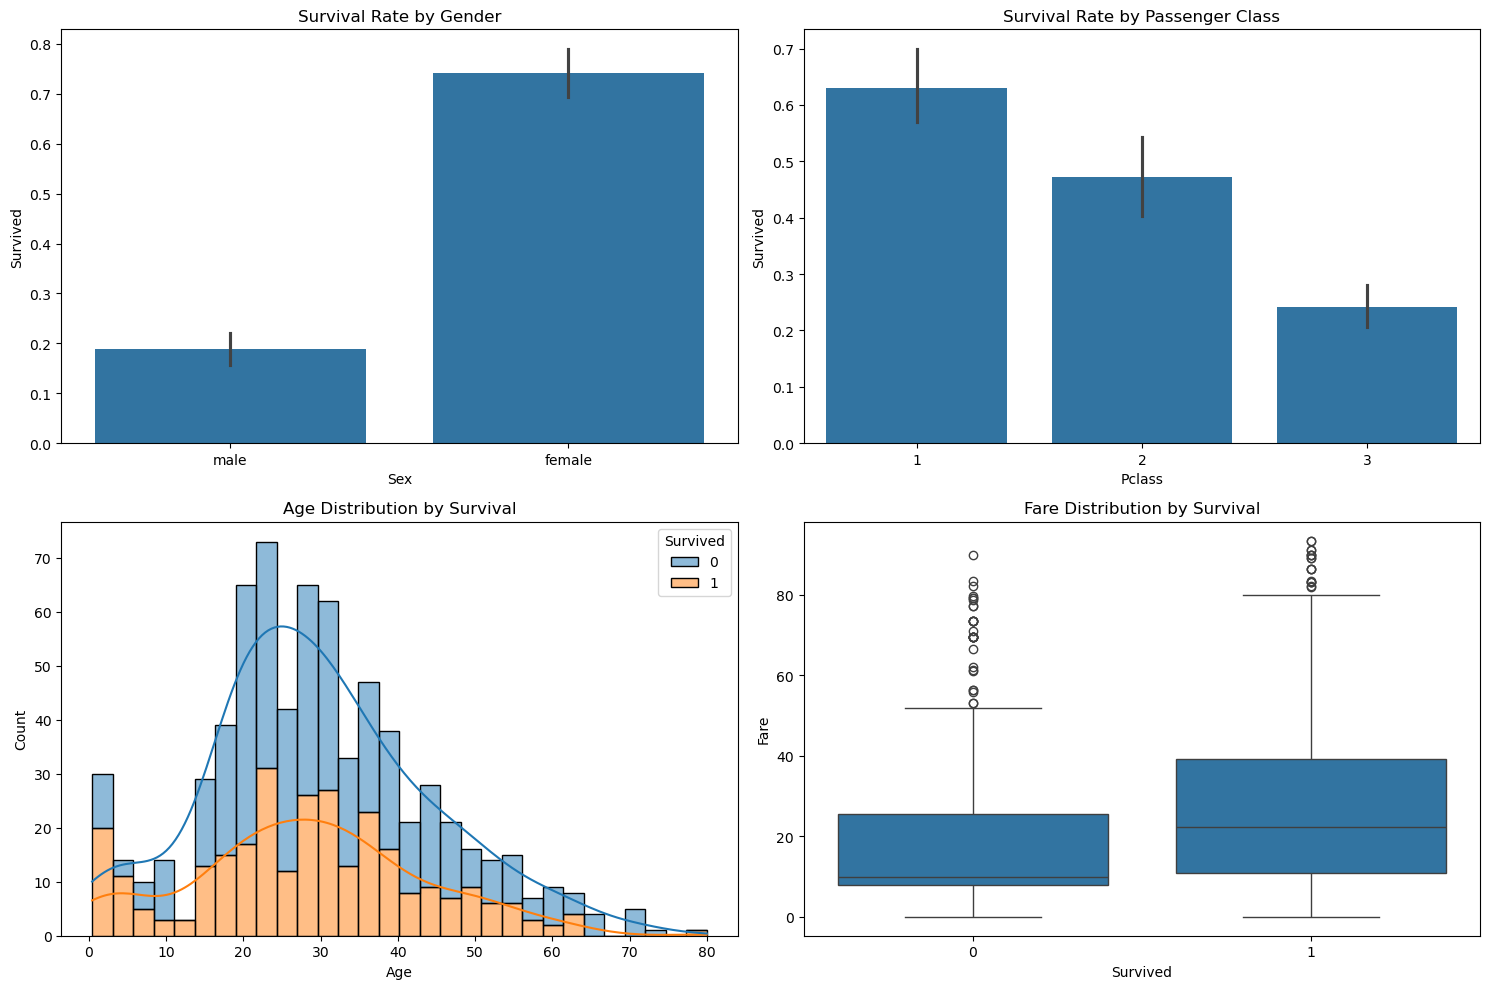

In [3]:
# Set up the figure
plt.figure(figsize=(15, 10))

# Survival by gender
plt.subplot(2, 2, 1)
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')

# Survival by passenger class
plt.subplot(2, 2, 2)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')

# Survival by age distribution
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, multiple='stack')
plt.title('Age Distribution by Survival')

# Survival by fare distribution
plt.subplot(2, 2, 4)
sns.boxplot(x='Survived', y='Fare', data=df[df['Fare'] < 100])  # Exclude outliers for better visualization
plt.title('Fare Distribution by Survival')

plt.tight_layout()
plt.show()

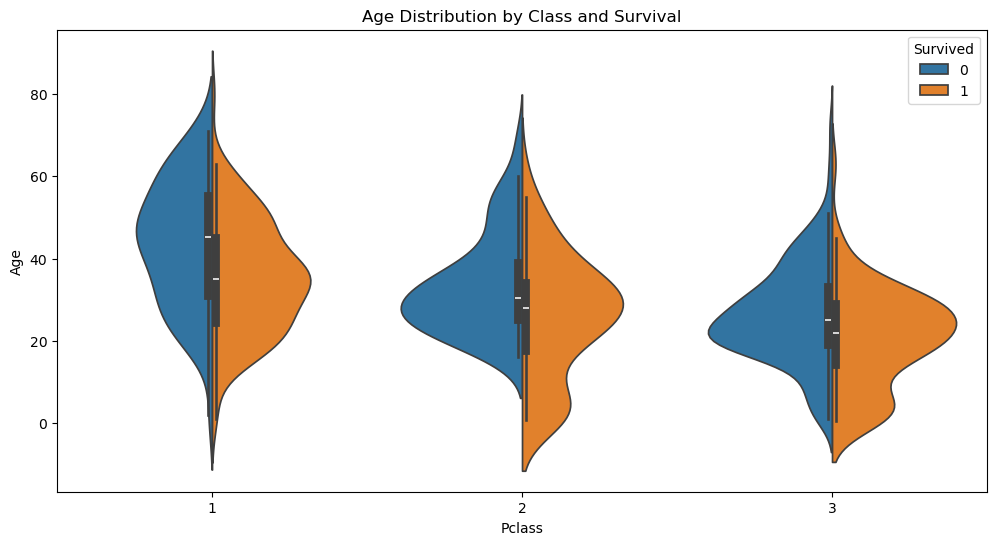


Survival rate for children vs adults:
IsChild
0    0.361183
1    0.539823
Name: Survived, dtype: float64


In [4]:
# Age distribution by survival and class
plt.figure(figsize=(12, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)
plt.title('Age Distribution by Class and Survival')
plt.show()

# Children survival
df['IsChild'] = df['Age'].apply(lambda x: 1 if x < 18 else 0)
child_survival = df.groupby('IsChild')['Survived'].mean()
print("\nSurvival rate for children vs adults:")
print(child_survival)

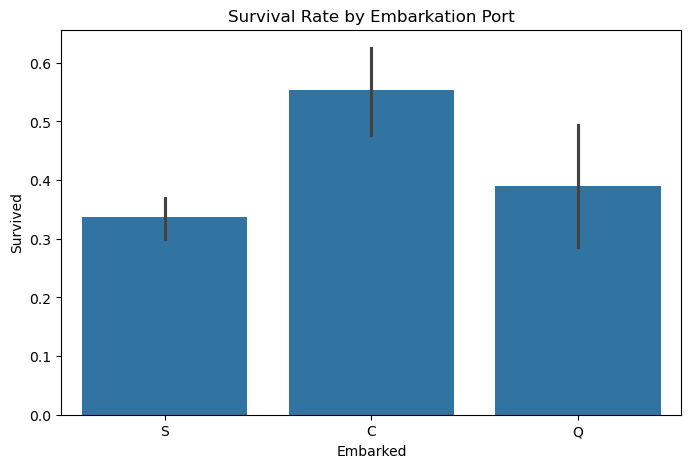

Pclass,1,2,3
Embarked,,,
C,0.505952,0.101190,0.392857
Q,0.025974,0.038961,0.935065
S,0.197205,0.254658,0.548137


In [6]:
# Survival by embarkation port
plt.figure(figsize=(8, 5))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarkation Port')
plt.show()

# Relationship between embarkation port and passenger class
pd.crosstab(df['Embarked'], df['Pclass'], normalize='index')